In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/irisflowerdatasets/IRIS1.csv
/kaggle/input/irisflowerdatasets/IRIS.csv


In [2]:
df = pd.read_csv("/kaggle/input/irisflowerdatasets/IRIS.csv")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
label_enc = LabelEncoder()
df['species'] = label_enc.fit_transform(df['species'])

In [7]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
df = df[df['species']!= 0][['sepal_width','petal_length','species']]

In [9]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

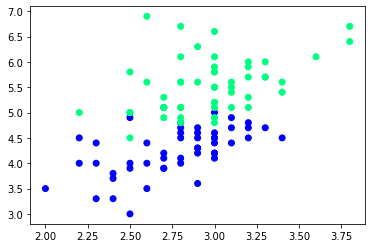

In [11]:
plt.scatter(df['sepal_width'],df['petal_length'], c = df['species'], cmap = 'winter')

In [12]:
df = df.sample(100)

In [13]:
df_train = df.iloc[:60,:].sample(10)
df_val= df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [14]:
df_train

,sepal_width,petal_length,species
109,3.6,6.1,2
86,3.1,4.7,1
84,3.0,4.5,1
145,3.0,5.2,2
106,2.5,4.5,2
71,2.8,4.0,1
99,2.8,4.1,1
78,2.9,4.5,1
141,3.1,5.1,2
149,3.0,5.1,2


In [17]:
x_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [18]:
x_test

array([[3. , 4.9],
       [3.2, 5.7],
       [2.5, 3.9],
       [3. , 5.5],
       [2.6, 5.6]])

# Case 1 -Bagging

In [19]:
# Data fro Tree 1
df_bag = df_train.sample(8,replace = True)

x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,sepal_width,petal_length,species
145,3.0,5.2,2
106,2.5,4.5,2
71,2.8,4.0,1
86,3.1,4.7,1
141,3.1,5.1,2
145,3.0,5.2,2
141,3.1,5.1,2
86,3.1,4.7,1


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [21]:
dt_bag1 = DecisionTreeClassifier()

In [22]:
def evaluate(clf,x,y):
    clf.fit(x,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(x.values,y.values, clf = clf, legend = 2)
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test,y_pred))

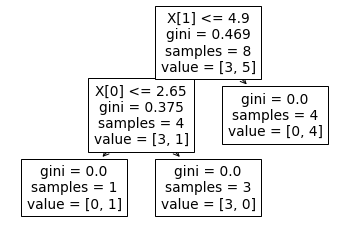

0.8


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


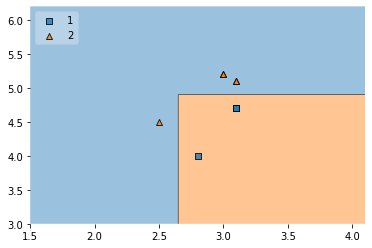

In [23]:
evaluate(dt_bag1,x,y)

In [24]:
# Data fro Tree 11
df_bag = df_train.sample(8,replace = True)

x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,sepal_width,petal_length,species
84,3.0,4.5,1
109,3.6,6.1,2
141,3.1,5.1,2
149,3.0,5.1,2
78,2.9,4.5,1
86,3.1,4.7,1
106,2.5,4.5,2
99,2.8,4.1,1


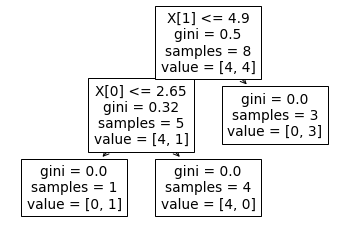

0.8


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


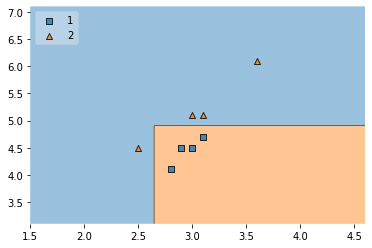

In [25]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,x,y)

In [26]:
# Data fro Tree 11
df_bag = df_train.sample(8,replace = True)

x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,sepal_width,petal_length,species
149,3.0,5.1,2
78,2.9,4.5,1
149,3.0,5.1,2
149,3.0,5.1,2
78,2.9,4.5,1
149,3.0,5.1,2
149,3.0,5.1,2
84,3.0,4.5,1


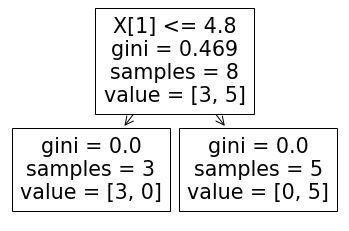

1.0


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


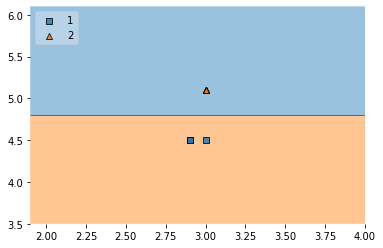

In [27]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,x,y)

#Predict

In [28]:
df_test

,sepal_width,petal_length,species
88,3.0,4.1,1
83,2.7,5.1,1
142,2.7,5.1,2
94,2.7,4.2,1
97,2.9,4.3,1


In [29]:
print("Predictor 1", dt_bag1.predict(np.array([2.9,6.3]).reshape(1,2)))
print("Predictor 2", dt_bag2.predict(np.array([2.9,6.3]).reshape(1,2)))
print("Predictor 3", dt_bag3.predict(np.array([2.9,6.3]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


# PASTING

In [30]:
df_train

,sepal_width,petal_length,species
109,3.6,6.1,2
86,3.1,4.7,1
84,3.0,4.5,1
145,3.0,5.2,2
106,2.5,4.5,2
71,2.8,4.0,1
99,2.8,4.1,1
78,2.9,4.5,1
141,3.1,5.1,2
149,3.0,5.1,2


In [31]:
df_train.sample(8)

,sepal_width,petal_length,species
71,2.8,4.0,1
149,3.0,5.1,2
145,3.0,5.2,2
106,2.5,4.5,2
109,3.6,6.1,2
141,3.1,5.1,2
78,2.9,4.5,1
84,3.0,4.5,1


# Random subspaces

# Colum sampling rather than row sampling

In [32]:
df1 = pd.read_csv("/kaggle/input/irisflowerdatasets/IRIS.csv")

In [33]:
df1.sample(2,replace=True, axis= 1)

,sepal_length,petal_width
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
...,...,...
145,6.7,2.3
146,6.3,1.9
147,6.5,2.0
148,6.2,2.3


# Random patchesd

# Both row and column sampling

In [34]:
df1.sample(2,replace=True, axis= 1).sample(8)

,species,species
3,Iris-setosa,Iris-setosa
116,Iris-virginica,Iris-virginica
2,Iris-setosa,Iris-setosa
78,Iris-versicolor,Iris-versicolor
15,Iris-setosa,Iris-setosa
121,Iris-virginica,Iris-virginica
50,Iris-versicolor,Iris-versicolor
47,Iris-setosa,Iris-setosa
